In [2]:
%matplotlib inline

In [3]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

# Gradient Descent Algorithm

## Abstract

Gradient Descent is an optimization algorithm for finding a local (or even better the global) minimum of a differentiable function.</br>
The idea is to start at any point in the function domain and find the direction of the steepest descent and take a step in that direction.</br>
We achieve that by calculating the steepest ascent and take a step in the opposite  direction.</br>
The algorithm was first introduced by Cauchy in 1847. Independently Hadamard introduces a similar method in 1907.</br>
Gradient Descent became popular for its non-linear optimization problems solving properties in 1944 which were first studied by Haskell Curry.

## Define a Problem:
Assume we have the function $ f(x, y) = x^{2} + y^{2} $ and we want to find the global minimum of that function.

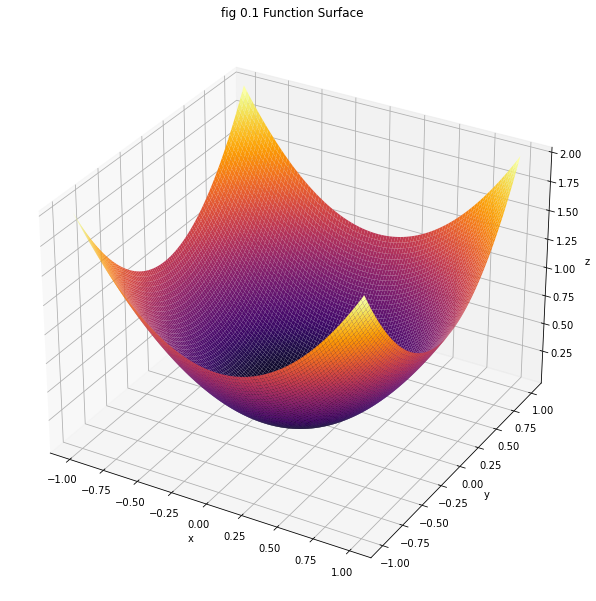

In [4]:
plt.gcf().set_size_inches(18.5, 10.5)
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('fig 0.1 Function Surface')
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
f = lambda x, y: x ** 2 + y ** 2

def plot_function_3d(f, x, y, ax):
    """
    Plots a function of two paramaters in 3d space
    """
    f_vectorized = np.vectorize(f)
    X, Y = np.meshgrid(x, y)
    Z = f_vectorized(X, Y)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='inferno')

plot_function_3d(f, x, y, ax)
plt.show()

For the sake of example we have chosen a really simple function. By plotting the function graph in fig 0.1 we can see that it is relatively easy to find the minimum of the function. One way of computing the minimum of the function is to use calculus to compute all the values of the function where $f'(x, y) = 0$ and choose the smallest of them. This approach may be applicable to simple functions with just a few parameters, but computing those derivatives and finding minima of functions with thousands or even millions of variables becomes a very difficult computational challenge. 

## How does Gradient Descent work?
1. We start by choosing random values for $x$ and $y$ which places us at some random point on the surface of our function.
2. Next we calculate the gradient vector:</br>
The gradient vector is just a list of the partial derivatives for each variable of our function at a given point a(x, y). This gives us the direction of increasing $f(x, y)$ for each variable $x$ and $y$. 
In our case the gradient looks like this:
$$ \nabla f = \begin{bmatrix}
    \displaystyle\frac{\partial f}{\partial x} \\[0.5cm]
    \displaystyle\frac{\partial f}{\partial y} \\
\end{bmatrix} $$
3. If we choose some small positive parameter $\eta$ (also known as learning rate) and take a small step in the opposite direction $-\eta\nabla f$ we will certainly go in the direction which $f$ decreases the most.

The way GD works is to repeatedly apply steps 2 and 3 over and over meaning we update our position: $\theta  = \theta - \eta\nabla f$ until we reach a minimum.

We may think of the analogy of a "ball" rolling down a "valley" which represents the surface of our function. 

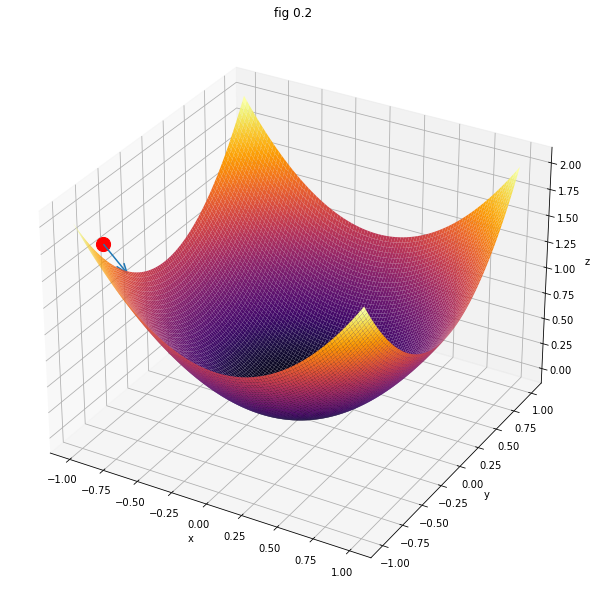

In [14]:
plt.gcf().set_size_inches(18.5, 10.5)
ax = plt.axes(projection='3d')
ax.set_title('fig 0.2')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


plot_function_3d(f, x, y, ax)

point_x = -0.99
point_y = -0.8
point_z = f(point_x, point_y)
ax.scatter(point_x, point_y + 0.1, point_z, c="red", s=200)
ax.quiver(point_x, point_y + 0.1, point_z, 0.1, 0.1, -0.3)
plt.show()

## Computational complexity
In practice our function, also know as a Cost function (sometimes called error or objective function) may have hundreds of thousands or even millions variables. Lets say we have to solve a classification problem where our Cost function measures the performance of a model that classifies elements in a large dataset into several categories. Assume we have a dataset with hundreds of thousands elements and each element is defined by many parameters. One commonly used example is the Quadratic loss function: $$ \lambda(x) = f(t - x)^{2} $$
Where $x$ represents the input to our model and $t$ is the expected output for the current example. In other words the function measures the difference between the target value and the output of our model and raises the result to the second power. As we mentioned earlier we need to find the cost for all of our members in the dataset which means that we need to compute the cost for every example. So our Cost function becomes: $$ \lambda(x) = \frac{1}{n}\sum_{x_{i}}^{n} (t_{i} - x_{i})^2$$ Where n denotes the number or examples in our dataset. This means that in order to minimize this gigantic Const function we need to compute the gradient vector $\nabla f_{x}$ for each individual example $x$ in the dataset and we often need to repeat those computations thousands of times taking small steps until we reach a minimum. Unfortunately solving real life problems require computations over very large datasets which can take a long time and finding the minimum becomes a slow and difficult task.

## Algorithm variations and optimizations
There are many modern variations of Gradient Descent but we will only take a look at some of them. 

### Stochastic Gradient Descent
SGD performs updates on the model after each training element in our dataset opposite to the plain GD algorithm where an update occurs after we calculate the error on the whole dataset. So instead of updating once per epoch we update after each training example $x$: 
$$\theta  = \theta - \eta\nabla f \rightarrow  \theta = \theta - \eta\nabla f (x_{i})$$

This behavior decreases training time significantly. Another difference in behavior is that while plain GD converges directly to the minimum of our function SGD's frequent updates cause high variance on the Cost function. The pros of this behavior are the ability to find potentially better local minima. On the other hand the fluctuation causes the algorithm to overshoot the exact minimum and eventually never reach it. However there is a simple solution to this problem. </br>
By slowly decreasing the learning rate $\eta$ over time we can achieve the accuracy of the standard GD.

#### Mini-batch Gradient Descent

Mini-batch Gradient Descent combines the plain GD and SGD and gets the best of both methods. The idea is to split the dataset into small samples of randomly selected elements called mini-batches $m$ and calculate the gradient $\nabla f_{m}$ over the sample. This method gives us a good estimate of the true gradient $\nabla f_{n}$ if we choose a large enough number of samples.

$$ \frac{\sum_{j=1}^m \nabla f_{x_{j}}}{m} \approx \frac{\sum_x \nabla f_x}{n} = \lambda(x) $$

Therefore our update rule becomes: $\theta = \theta - \eta\nabla f(m)$

Those optimizations gives us more accurate estimation of the minimum without extending the training time. Therefore it is widely used in deep learning libraries. Of course this method is not perfect like everything in real life so it has its disadvantages. For instance choosing the right learning rate can be difficult. If we choose $\eta$ to be too small it slows down the algorithm making it inefficient. On the other hand if $\eta$ is too large it can cause the Cost function to fluctuate so much that it could diverge from the minimum.

## Momentum
[//]: # "TODO: Plot a graphic on SGD oscillation"
SGD struggles to find the minimum in areas where the surface curves much more steeply in one dimension than in another, which is common around local minimum. In this case SGD oscillates across the slopes making very little progress towards the minimum as visualized in fig 3.

![Alt text](./SGD_without_momentum.png) fig 3

Momentum is a method that accelerates SGD towards the minimum therefore minimizing the oscillation as visualized in fig 4.

![Alt text](./SGD_with_momentum.png) fig 4

To achieve this we add another parameter $\gamma$ representing a fraction of the previous update vector to the current update vector:

$ v_{t} = \gamma v_{t-1} + \eta \nabla f $ </br>
$\theta = \theta - v_{t}$

The momentum term increases for dimensions whose gradients point in the same directions and reduces updates for dimensions whose gradients change directions. As a result, we gain faster convergence and reduced oscillation.

### Adam
The name Adam comes form Adaptive Moment Estimation. While SGD has a fixed learning rate and momentum that applies for all parameters of all training examples Adam is an algorithm that has adaptive learning rates and momentum for each individual parameter of the training examples.
This means that this method achieves significantly higher accuracy of estimating the global minimum of our Cost function for shorter training time. 
To get into more details we compute the gradient of the current time step $t$. This means that we compute the partial derivatives for each parameter of our current training example: 

$g_{t,i} = \frac{\partial f}{\partial \theta_{i}}$

Then we compute the exponentially decaying average of past gradients $m_{t}$ as follows:

Eq. 1: $m_{t} = \beta_{1}m_{t-1} + (1 - \beta_{1})g_{t}$

Where we denote the current time step as $t$ and $g_{t,i}$ is the partial derivative of the cost function to the i-th parameter $\theta_{i}$ at time step $t$.
$g_{t,i} = \frac{\partial f}{\partial \theta_{i}}$ So $g_{t}$ is the gradient vector of partial derivatives in the current time step $t$.

$\beta$ is a hyperparameter in the range $ 0 < \beta < 1$ and it is recommended to be set to 0.9. The formula in Eq. 1 suggests that we give more significance to the direction of previous gradients $m_{t-1}$ and less to the current gradient $g_{t}$.

Further more we calculate the exponentially decaying average of the previous squared gradients $v_t$:

$v_{t} = \beta_{2}v_{t-1} + (1 - \beta_{2})g_{t}^2$

$m_{t}$ and $v_{t}$ are estimates of the first moment (the mean) and the second moment (Mean Square Error) of the gradients. As $m_{t}$ and $v_{t}$ are initialized as vectors of 0's it is observed that they are biased towards zero, especially during the initial time steps, and especially when the decay rates are small (i.e. $\beta 1$ and $\beta 2$ are close to 1). Because of this we need to correct $m_{t}$ and $v_{t}$ so that: 

$\hat{m_{t}} = \frac{m_{t}}{1 - \beta_{1}^{t}} $ 

$\hat{v_{t}} = \frac{v_{t}}{1 - \beta_{1}^{t}} $ 

And finally we update the parameter vector:

 $\theta_{t+1} = \theta_{t} - \frac{\eta}{\sqrt{\hat{v_{t}} + \epsilon}} \hat{m_{t}} $

 Notice that $\epsilon$ is just a really small parameter with recommended value of ($10^{-8}$) whose purpose is just to avoid dividing by 0.

 There are suggested values for the parameters that give optimal results in most cases:

 $\beta_{1} = 0.9$
 
 $\beta_{2} = 0.999$

 $\eta = 0.001$




## Sources:
https://en.wikipedia.org/wiki/Gradient_descent</br>
http://neuralnetworksanddeeplearning.com/chap1.html#learning_with_gradient_descent </br>
https://en.wikipedia.org/wiki/Loss_function </br>
https://ruder.io/optimizing-gradient-descent/ </br>
https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/